In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, AveragePooling1D , Flatten, Input, LSTM, TimeDistributed
from sklearn.model_selection import train_test_split
import pprint as pp
import keras_tuner as kt
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle


# For data processing
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# For data processing and manipulation
import pandas as pd

# For date calculations
import datetime

# For encoding the label(word to onehot)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For spliting the dataset into Train, Validation and Test
from sklearn.model_selection import train_test_split

from scipy.stats import hmean

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold

# For evaluation metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

# For SOM
#from minisom import MiniSom

# For ploting data
import itertools
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For checking path
import os
from os import path
import csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


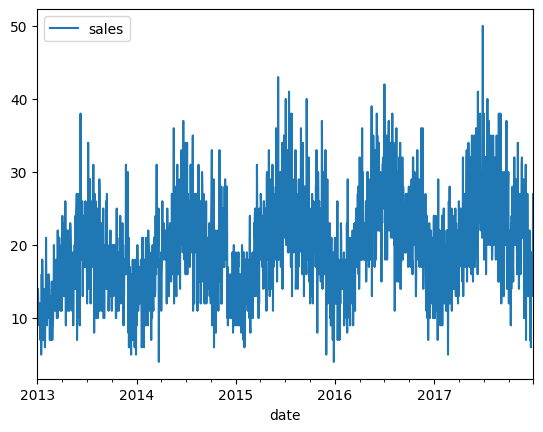

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")
df.plot(x = 'date', y = 'sales')
plt.show()

In [ ]:
df.shape

(1826, 3)

In [ ]:
df.head()

,Unnamed: 0,date,sales
0,0,2013-01-01,13
1,1,2013-01-02,11
2,2,2013-01-03,14
3,3,2013-01-04,13
4,4,2013-01-05,10


In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [ ]:
# Process the Dates column
df['date'] = pd.to_datetime(df['date'])

# Divide Dates into year, month, day, hour, minute
df['Year'] = df['date'].apply(lambda x: x.year)
df['Month'] = df['date'].apply(lambda x: x.month)
df['DayofMonth'] = df['date'].apply(lambda x: x.day)
df.head()

,date,sales,Year,Month,DayofMonth
0,2013-01-01,13,2013,1,1
1,2013-01-02,11,2013,1,2
2,2013-01-03,14,2013,1,3
3,2013-01-04,13,2013,1,4
4,2013-01-05,10,2013,1,5


In [ ]:
# Finding number of unique years
num_year = df['Year'].nunique()
num_year

5

In [ ]:
raw_seq = df['sales']

In [ ]:
train_seq = raw_seq[:1095]
val_seq = raw_seq[1095:1461].reset_index(drop=True)
test_seq = raw_seq[1461:].reset_index(drop=True)

In [ ]:
print(train_seq.size, val_seq.size, test_seq.size)

1095 366 365


In [ ]:
# univariate data preparation
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:

n_steps = 30

X_train, y_train = split_sequence(train_seq, n_steps)
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=10)
X_test, y_test = split_sequence(test_seq, n_steps)
X_val, y_val = split_sequence(val_seq, n_steps)

n_features = 1
n_seq = 3
n_steps = 10

X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], n_seq, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(64, 1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, None, 10, 64)     128       
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, None, 5, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, None, 320)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 50)                74200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                     

In [ ]:
# tuner = kt.tuners.Hyperband(
#     CNN_LSTM,
#     objective='val_mean_squared_error',
#     max_epochs=30,
#     hyperband_iterations=5,
#     directory='cnn_lstm_exp',
#     project_name='demand forecasting')

In [ ]:
# tuner.search_space_summary()

In [ ]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
# tuner.search(X_train_shuffled, y_train_shuffled, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])

In [ ]:
# # Get the top 2 models.
# models = tuner.get_best_models(num_models=2)
# best_model = models[0]
# # Build the model.
# # Needed for `Sequential` without specified `input_shape`.
# best_model.build(input_shape=(30, 1))
# best_model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError(),
                                                     tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()])

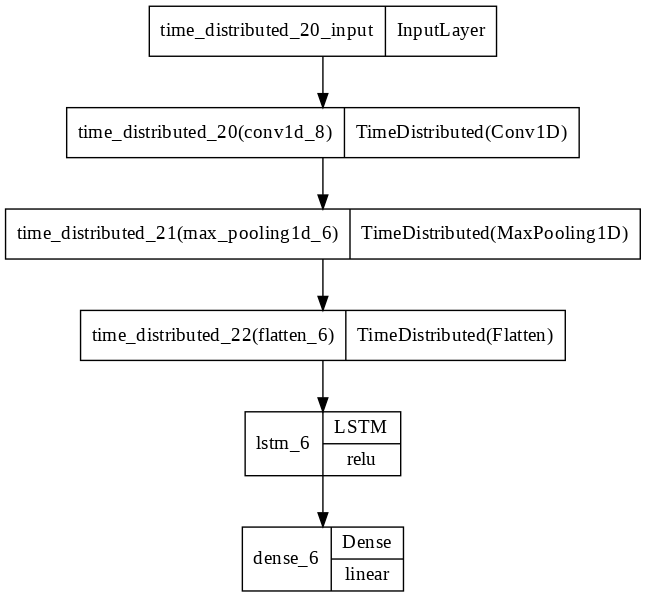

In [ ]:
plot_model(model, show_layer_activations=True, dpi=100)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=100, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [ ]:
hist =  model.fit(X_train, y_train, batch_size=120, epochs=2000, verbose=2, validation_data=(X_val, y_val), callbacks=[callback])
score = model.evaluate(X_test, y_test, return_dict=True)
y_pred = model.predict(X_test)

Epoch 1/2000
9/9 - 2s - loss: 87.3664 - mean_absolute_error: 7.4476 - root_mean_squared_error: 9.3470 - mean_absolute_percentage_error: 44.3627 - mean_squared_error: 87.3664 - val_loss: 33.0675 - val_mean_absolute_error: 4.6109 - val_root_mean_squared_error: 5.7504 - val_mean_absolute_percentage_error: 23.9886 - val_mean_squared_error: 33.0675 - 2s/epoch - 266ms/step
Epoch 2/2000
9/9 - 0s - loss: 31.7230 - mean_absolute_error: 4.4004 - root_mean_squared_error: 5.6323 - mean_absolute_percentage_error: 25.5469 - mean_squared_error: 31.7230 - val_loss: 31.9775 - val_mean_absolute_error: 4.4945 - val_root_mean_squared_error: 5.6549 - val_mean_absolute_percentage_error: 22.1371 - val_mean_squared_error: 31.9775 - 171ms/epoch - 19ms/step
Epoch 3/2000
9/9 - 0s - loss: 27.8522 - mean_absolute_error: 4.1126 - root_mean_squared_error: 5.2775 - mean_absolute_percentage_error: 26.1826 - mean_squared_error: 27.8522 - val_loss: 31.6377 - val_mean_absolute_error: 4.4695 - val_root_mean_squared_error:

In [ ]:
model.evaluate(X_train, y_train, return_dict=True)

34/34 [==============================] - 0s 3ms/step - loss: 22.4081 - mean_absolute_error: 3.6856 - root_mean_squared_error: 4.7337 - mean_absolute_percentage_error: 23.6301 - mean_squared_error: 22.4081


{'loss': 22.408100128173828,
 'mean_absolute_error': 3.6856441497802734,
 'mean_absolute_percentage_error': 23.630117416381836,
 'mean_squared_error': 22.408100128173828,
 'root_mean_squared_error': 4.733719348907471}

In [ ]:
model.evaluate(X_val, y_val, return_dict=True)

11/11 [==============================] - 0s 3ms/step - loss: 27.5207 - mean_absolute_error: 4.2221 - root_mean_squared_error: 5.2460 - mean_absolute_percentage_error: 20.8417 - mean_squared_error: 27.5207


{'loss': 27.52065086364746,
 'mean_absolute_error': 4.222102642059326,
 'mean_absolute_percentage_error': 20.841726303100586,
 'mean_squared_error': 27.52065086364746,
 'root_mean_squared_error': 5.2460126876831055}

In [ ]:
score

{'loss': 29.789443969726562,
 'mean_absolute_error': 4.358006954193115,
 'mean_absolute_percentage_error': 22.001604080200195,
 'mean_squared_error': 29.789443969726562,
 'root_mean_squared_error': 5.45797061920166}

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'mean_absolute_percentage_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error', 'val_mean_absolute_percentage_error', 'val_mean_squared_error'])


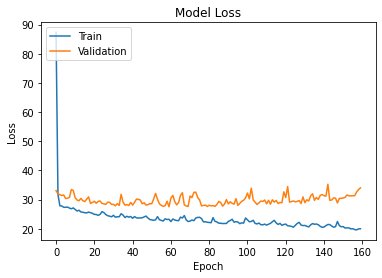

In [ ]:
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("stacked_lstm_loss.png", dpi=300)
plt.show()

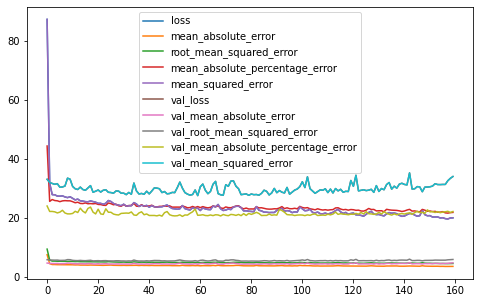

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

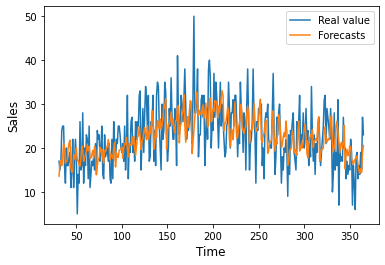

In [ ]:
dates = np.array(range(31, 366))
plt.plot(dates, y_test, label='Real value')
plt.plot(dates, y_pred, label='Forecasts')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.savefig("cnn-lstm_forecast.png", dpi=500)
plt.show()

In [ ]:
from scipy import stats
stats.ttest_ind(y_pred, y_test)

Ttest_indResult(statistic=array([-0.41705695], dtype=float32), pvalue=array([0.67677075]))

In [ ]:
model.save('cnn-lstm.h5')